# Separating Chemical [Challenge]
👨‍💻 **Arjun Adhikari**, July 20, 2019

Import the required libraries.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### Importing the datasets

In [2]:
dfx=pd.read_csv('Logistic_X_Train.csv')
dfy=pd.read_csv('Logistic_Y_Train.csv')
print(dfx.shape)
print(dfy.shape)

(3000, 3)
(3000, 1)


In [3]:
print(dfx.head())

         f1        f2        f3
0 -1.239375  0.749101 -0.528515
1 -1.036070  0.801436 -1.283712
2 -0.615579  1.579521 -1.391927
3  1.335978  1.348651  1.433564
4  0.658925  1.300019  0.571603


In [4]:
dfx=dfx.values
dfy=dfy.values

In [5]:
#ones=np.ones((dfx.shape[0],1))
#X=np.concatenate((ones,dfx),axis=1)
Y=dfy
X=dfx

### Applying Algorithm

#### Hypothesis Function

In [6]:
def hypothesis(theta,b,x):
    
    h=np.dot(x,theta)+b
    return sigmoid(h)

#### Sigmoid Function

In [7]:
def sigmoid(z):
    
    return (1.0/(1+np.exp(-1.0*z)))

#### Error Function

In [8]:
def error(theta,X,b,Y_true):
    
    err=0.0
    m=X.shape[0]
    
    for i in range(m):
        h=hypothesis(theta,b,X[i])
        err+=(Y_true[i]*np.log2(h)+ (1-Y_true[i])*(np.log2(1-h)))
        
    return -err/m

#### Getting the Gradients

In [9]:
def getgrads(theta,X,b,Y_true):
    
    grad_w=np.zeros(theta.shape[0],)
    grad_b=0.0
    m=X.shape[0]
    
    for i in range(m):
        hx=hypothesis(theta,b,X[i])
        grad_w+=(Y_true[i]-hx)*X[i]
        grad_b+=(Y_true[i]-hx)
        
    grad_w/=m
    grad_b/=m
    
    return (grad_w,grad_b)

#### Gradient Descent Algorithm

In [10]:
def gradientDescent(X,Y_true,w,b,learning_rate=0.1,max_itr=10):
    
    itr=0
    total_err = []
    
    for itr in range(max_itr):
        err=error(w,X,b,Y_true)
        total_err.append(err)
        grad_w,grad_b=getgrads(w,X,b,Y_true)
        
        w=w+learning_rate*grad_w
        b=b+learning_rate*grad_b
        
    return(w,b, total_err)

In [11]:
w=np.random.random(X.shape[1])
b=np.random.random()

In [12]:
X.shape

(3000, 3)

In [13]:
Y.shape

(3000, 1)

In [14]:
w,b, losses =gradientDescent(X,Y,w,b,learning_rate=0.1,max_itr=100)

In [15]:
print(w)
print(b)

[-1.27012871  0.29408341 -1.20873192]
[-0.04161151]


#### Plotting the losses

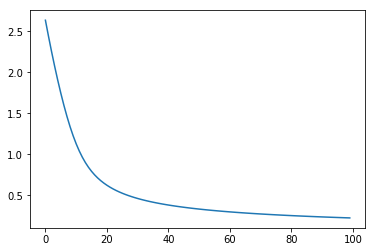

In [16]:
plt.plot(losses)
plt.show()

### Testing Result

In [17]:
df_test=pd.read_csv('Logistic_X_Test.csv')
print(df_test.shape)

(1000, 3)


In [18]:
df_test=np.array(df_test)
pred=[]

for i in range(df_test.shape[0]):
    
    confidence=hypothesis(w,b,df_test[i])
    
    if(confidence<0.5):
        pred.append(0)
    else:
        pred.append(1)

In [19]:
print(len(pred))

1000


In [20]:
result_df=pd.DataFrame(pred,columns=["label"])

In [21]:
result_df.to_csv("Final.csv",index=False)

After getting the result, I exported to ```Final.csv```.